# Sentiment Analysis Model

## Training the Data

In [1]:
import pandas as pd
import numpy as np

#NLTK
import nltk
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize
from nltk.corpus import stopwords

#Keras
from numpy import array

#Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

#Plotting 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## TASS Workshop

Source:

TASS-2017: Workshop on Semantic Analysis at SEPLN (http://www.sepln.org/workshops/tass/2017/)

TASS Workshop on Semantic Analysis has been held since 2012, under the umbrella of the International Conference of the Spanish Society for Natural Language Processing (SEPLN). TASS was the first shared task on sentiment analysis in Twitter in Spanish. The initial aim of TASS was the furtherance of research on sentiment analysis in Spanish with a special interest on the language used in Twitter.

In [2]:
import xml.etree.ElementTree as ET
tree = ET.parse('Resources/general-train-tagged-3l.xml')
root = tree.getroot()

In [3]:
train_data = pd.DataFrame({'tweetText':[],'polarity_value':[]})
row=0
for tweet in root:
    tweetText = tweet.find('content').text
    lang = tweet.find('lang').text
    polarity_value = tweet.find('sentiments').find('polarity').find('value').text

    if lang == 'es':
        train_data.loc[row] = [tweetText,polarity_value]
        row+=1

train_data

,tweetText,polarity_value
0,"Salgo de #VeoTV , que día más largoooooo...",NONE
1,@PauladeLasHeras No te libraras de ayudar me/n...,NEU
2,@marodriguezb Gracias MAR,P
3,"Off pensando en el regalito Sinde, la que se v...",N
4,Conozco a alguien q es adicto al drama! Ja ja ...,P
...,...,...
7213,Muy indignante si ...nadie repara en ello hoy ...,N
7214,Más pobres por discriminar a la mujer http://t...,N
7215,Crean un banco de productos para mujeres con c...,P
7216,Sobre la sorprendente huída hoy en el Senado d...,N


In [4]:
train_data = train_data.set_index("polarity_value")
train_data

,tweetText
polarity_value,
NONE,"Salgo de #VeoTV , que día más largoooooo..."
NEU,@PauladeLasHeras No te libraras de ayudar me/n...
P,@marodriguezb Gracias MAR
N,"Off pensando en el regalito Sinde, la que se v..."
P,Conozco a alguien q es adicto al drama! Ja ja ...
...,...
N,Muy indignante si ...nadie repara en ello hoy ...
N,Más pobres por discriminar a la mujer http://t...
P,Crean un banco de productos para mujeres con c...


In [5]:
train_data = train_data.drop("NONE", axis=0)
train_data

,tweetText
polarity_value,
NEU,@PauladeLasHeras No te libraras de ayudar me/n...
P,@marodriguezb Gracias MAR
N,"Off pensando en el regalito Sinde, la que se v..."
P,Conozco a alguien q es adicto al drama! Ja ja ...
P,Toca @crackoviadeTV3 . Grabación dl especial N...
...,...
N,Muy indignante si ...nadie repara en ello hoy ...
N,Más pobres por discriminar a la mujer http://t...
P,Crean un banco de productos para mujeres con c...


In [6]:
train_data = train_data.reset_index()
train_data

,polarity_value,tweetText
0,NEU,@PauladeLasHeras No te libraras de ayudar me/n...
1,P,@marodriguezb Gracias MAR
2,N,"Off pensando en el regalito Sinde, la que se v..."
3,P,Conozco a alguien q es adicto al drama! Ja ja ...
4,P,Toca @crackoviadeTV3 . Grabación dl especial N...
...,...,...
5731,N,Muy indignante si ...nadie repara en ello hoy ...
5732,N,Más pobres por discriminar a la mujer http://t...
5733,P,Crean un banco de productos para mujeres con c...
5734,N,Sobre la sorprendente huída hoy en el Senado d...


In [7]:
train_data['polarity_value'] = train_data['polarity_value'].replace(['NEU'],0)
train_data['polarity_value'] = train_data['polarity_value'].replace(['P'],1)
train_data['polarity_value'] = train_data['polarity_value'].replace(['N'],-1)
train_data

,polarity_value,tweetText
0,0,@PauladeLasHeras No te libraras de ayudar me/n...
1,1,@marodriguezb Gracias MAR
2,-1,"Off pensando en el regalito Sinde, la que se v..."
3,1,Conozco a alguien q es adicto al drama! Ja ja ...
4,1,Toca @crackoviadeTV3 . Grabación dl especial N...
...,...,...
5731,-1,Muy indignante si ...nadie repara en ello hoy ...
5732,-1,Más pobres por discriminar a la mujer http://t...
5733,1,Crean un banco de productos para mujeres con c...
5734,-1,Sobre la sorprendente huída hoy en el Senado d...


In [8]:
train_data = train_data[['tweetText','polarity_value']]
train_data

,tweetText,polarity_value
0,@PauladeLasHeras No te libraras de ayudar me/n...,0
1,@marodriguezb Gracias MAR,1
2,"Off pensando en el regalito Sinde, la que se v...",-1
3,Conozco a alguien q es adicto al drama! Ja ja ...,1
4,Toca @crackoviadeTV3 . Grabación dl especial N...,1
...,...,...
5731,Muy indignante si ...nadie repara en ello hoy ...,-1
5732,Más pobres por discriminar a la mujer http://t...,-1
5733,Crean un banco de productos para mujeres con c...,1
5734,Sobre la sorprendente huída hoy en el Senado d...,-1


In [9]:
train_data.polarity_value.value_counts()

 1    2884
-1    2182
 0     670
Name: polarity_value, dtype: int64

In [10]:
train_data['processed_tweet'] = train_data.tweetText

<ipython-input-10-4fab69b2716d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['processed_tweet'] = train_data.tweetText


In [11]:
train_data

,tweetText,polarity_value,processed_tweet
0,@PauladeLasHeras No te libraras de ayudar me/n...,0,@PauladeLasHeras No te libraras de ayudar me/n...
1,@marodriguezb Gracias MAR,1,@marodriguezb Gracias MAR
2,"Off pensando en el regalito Sinde, la que se v...",-1,"Off pensando en el regalito Sinde, la que se v..."
3,Conozco a alguien q es adicto al drama! Ja ja ...,1,Conozco a alguien q es adicto al drama! Ja ja ...
4,Toca @crackoviadeTV3 . Grabación dl especial N...,1,Toca @crackoviadeTV3 . Grabación dl especial N...
...,...,...,...
5731,Muy indignante si ...nadie repara en ello hoy ...,-1,Muy indignante si ...nadie repara en ello hoy ...
5732,Más pobres por discriminar a la mujer http://t...,-1,Más pobres por discriminar a la mujer http://t...
5733,Crean un banco de productos para mujeres con c...,1,Crean un banco de productos para mujeres con c...
5734,Sobre la sorprendente huída hoy en el Senado d...,-1,Sobre la sorprendente huída hoy en el Senado d...


## AMLO Tweets

5 days before/after the video scandal from Pio Lopez Obrador

In [12]:
amlo_tweets = pd.read_csv('Resources/Tweets.csv')
amlo_tweets

,Content,Date,User
0,"Sí, también misóginos y arribistas.",30 ago.,@laishawilkins
1,No puedo entender como “hombres” que se presum...,30 ago.,@serabenh
2,Comunista de ultra derecha,29 ago.,@MACNASRUDIN
3,Gran presidente apoyo total a nuestro presiden...,30 ago.,@ArmandoZermeno2
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.,@gerryboy10
...,...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.,@YOSOYIZQUIERDA2
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.,@YOSOYIZQUIERDA2
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.,@TaCabronNo1
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.,@ElGuyTrejo


In [13]:
amlo_tweets=amlo_tweets.rename(columns={'Content':'tweetText'})
amlo_tweets

,tweetText,Date,User
0,"Sí, también misóginos y arribistas.",30 ago.,@laishawilkins
1,No puedo entender como “hombres” que se presum...,30 ago.,@serabenh
2,Comunista de ultra derecha,29 ago.,@MACNASRUDIN
3,Gran presidente apoyo total a nuestro presiden...,30 ago.,@ArmandoZermeno2
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.,@gerryboy10
...,...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.,@YOSOYIZQUIERDA2
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.,@YOSOYIZQUIERDA2
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.,@TaCabronNo1
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.,@ElGuyTrejo


In [14]:
amlo_tweets = amlo_tweets[["tweetText","Date"]]
amlo_tweets

,tweetText,Date
0,"Sí, también misóginos y arribistas.",30 ago.
1,No puedo entender como “hombres” que se presum...,30 ago.
2,Comunista de ultra derecha,29 ago.
3,Gran presidente apoyo total a nuestro presiden...,30 ago.
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.
...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.


In [15]:
amlo_tweets['processed_tweet'] = amlo_tweets.tweetText
amlo_tweets

,tweetText,Date,processed_tweet
0,"Sí, también misóginos y arribistas.",30 ago.,"Sí, también misóginos y arribistas."
1,No puedo entender como “hombres” que se presum...,30 ago.,No puedo entender como “hombres” que se presum...
2,Comunista de ultra derecha,29 ago.,Comunista de ultra derecha
3,Gran presidente apoyo total a nuestro presiden...,30 ago.,Gran presidente apoyo total a nuestro presiden...
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.,"Con la panzota que se carga ??? No mame , no e..."
...,...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.,@lopezobrador_ Y vemos en tv cualquier cantida...
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.,@lopezobrador_ La trata de personas vemos un ...
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.,@lopezobrador_ debe estar muy orgulloso por ha...
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.,@lopezobrador_ anunciará el 15 de Septiembre q...


## Data Processing

### Hashtags

In [16]:
import re
hash_regex = re.compile(r"#(\w+)")
hashtags = [] 
def hash_repl(match):
    _ = '__HASH__'+match.group(1).upper()
    hashtags.append(_)
    return _

### URL

In [17]:
url_regex = re.compile(r"(http|https|ftp)://[a-zA-Z0-9\./]+")
def url_repl(match):
    return '__URL__'

### Repetitions

In [18]:
rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE);
def rpt_repl(match):
    return match.group(1)+match.group(1)

In [19]:
# Testing
re.sub(rpt_regex, rpt_repl, "Reppppppeated characters in wordsssss" )

'Reppeated characters in wordss'

### Usernames

In [20]:
user_regex = re.compile(r"@(\w+)")
usr_names = [] # To store the user names so we can exclude them from some parts of the analysis
def user_repl(match):
    _ = '__USER__'+match.group(1).upper()
    usr_names.append(_)
    return _

### Punctuation

In [21]:
# Spliting by word boundaries
word_bound_regex = re.compile(r"\W+")

# Punctuations
punctuations = \
    [   
        ('__PEXCL__',    ['!', '¡', ] )    ,\
        ('__PQUES__',    ['?', '¿', ] )    ,\
        ('__PPROG__',    ['...', '…', ] )  ,\
    ]

#For punctuation replacement
def punctuations_repl(match):
    text = match.group(0)
    repl = []
    for (key, parr) in punctuations :
        for punc in parr :
            if punc in text:
                repl.append(key)
    if(len(repl)>0 ) :
        return ' '+' '.join(repl)+' '
    else :
        return ' '

### Stopwords

In [22]:
#nltk.download('stopwords')
#stop_words=list(set(stopwords.words('spanish')) - set(['no','nadie','nunca','si','sí','muy','bien','mal'])) 

#def stopwords(text):
#    text = [w for w in text if not w in stop_words]
    
#    return(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cecit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#stop_words

['tuvimos',
 'seré',
 'eso',
 'ya',
 'estuvieses',
 'estuvieseis',
 'seríamos',
 'habiendo',
 'habidos',
 'habríais',
 'estarás',
 'habríamos',
 'tendrás',
 'estéis',
 'hay',
 'tendrías',
 'estados',
 'ellos',
 'están',
 'estuvimos',
 'sois',
 'tuviésemos',
 'algunas',
 'la',
 'hemos',
 'o',
 'fueses',
 'siente',
 'tienen',
 'también',
 'poco',
 'tengan',
 'hubiéramos',
 'mucho',
 'tuve',
 'has',
 'habías',
 'estar',
 'tuyos',
 'hubisteis',
 'sentido',
 'ni',
 'tendréis',
 'tuvieran',
 'tuviera',
 'estamos',
 'tuya',
 'estarán',
 'estaríamos',
 'tuvieseis',
 'e',
 'teniendo',
 'estarían',
 'hubiésemos',
 'este',
 'tú',
 'tendría',
 'suya',
 'hubiera',
 'el',
 'tuvisteis',
 'seáis',
 'sentidos',
 'estás',
 'estaban',
 'otra',
 'tendrán',
 'esos',
 'fueseis',
 'habrás',
 'estuvo',
 'nada',
 'cual',
 'haya',
 'estas',
 'tu',
 'hubieses',
 'quienes',
 'habida',
 'fuera',
 'uno',
 'hayas',
 'tus',
 'mías',
 'eres',
 'vuestras',
 'estemos',
 'fuimos',
 'habido',
 'tuviéramos',
 'fuerais',
 '

### Further Cleaning & Stemming

In [24]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish', ignore_stopwords = True)

In [25]:
def clean(text):
    text = re.sub('\w+', lambda x:'' if x.group().startswith('__') else x.group(), text)
    
    return(text)

In [26]:
def processAll(text):
    text = re.sub( hash_regex, hash_repl, text )
    text = re.sub( user_regex, user_repl, text)
    text = re.sub( url_regex, url_repl, text )
    
    text = text.replace('\'','')
    
    text = re.sub( word_bound_regex , punctuations_repl, text )
    text = re.sub( rpt_regex, rpt_repl, text )
    
    text = clean(text)
    
    return text

In [27]:
train_data['processed_tweet'] = train_data.tweetText.apply(processAll)
amlo_tweets['processed_tweet'] = amlo_tweets.tweetText.apply(processAll)

<ipython-input-27-88a2a791a33d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['processed_tweet'] = train_data.tweetText.apply(processAll)


In [28]:
train_data

,tweetText,polarity_value,processed_tweet
0,@PauladeLasHeras No te libraras de ayudar me/n...,0,No te libraras de ayudar me nos Besos y gracias
1,@marodriguezb Gracias MAR,1,Gracias MAR
2,"Off pensando en el regalito Sinde, la que se v...",-1,Off pensando en el regalito Sinde la que se va...
3,Conozco a alguien q es adicto al drama! Ja ja ...,1,Conozco a alguien q es adicto al drama Ja ja ...
4,Toca @crackoviadeTV3 . Grabación dl especial N...,1,Toca Grabación dl especial Navideño Mari cri...
...,...,...,...
5731,Muy indignante si ...nadie repara en ello hoy ...,-1,Muy indignante si nadie repara en ello hoy aq...
5732,Más pobres por discriminar a la mujer http://t...,-1,Más pobres por discriminar a la mujer
5733,Crean un banco de productos para mujeres con c...,1,Crean un banco de productos para mujeres con c...
5734,Sobre la sorprendente huída hoy en el Senado d...,-1,Sobre la sorprendente huída hoy en el Senado d...


In [29]:
def sb_stem(text):
    text = [word if(word[0:2]=='__') else word.lower() for word in text.split() if ((len(word) >= 3) or (word in ['no','si', 'sí', 'ni']))] #keep the small words (like 'no')
    text = [stemmer.stem(w) if w[0:2]!='__' else w for w in text ]
    
    return(text)

In [30]:
train_data['stemmed_tweet'] = train_data.processed_tweet.apply(sb_stem)
amlo_tweets['stemmed_tweet'] = amlo_tweets.processed_tweet.apply(sb_stem)

<ipython-input-30-e0a594fbf798>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['stemmed_tweet'] = train_data.processed_tweet.apply(sb_stem)


In [31]:
train_data

,tweetText,polarity_value,processed_tweet,stemmed_tweet
0,@PauladeLasHeras No te libraras de ayudar me/n...,0,No te libraras de ayudar me nos Besos y gracias,"[libr, ayud, nos, bes, graci]"
1,@marodriguezb Gracias MAR,1,Gracias MAR,"[graci, mar]"
2,"Off pensando en el regalito Sinde, la que se v...",-1,Off pensando en el regalito Sinde la que se va...,"[off, pens, regalit, sind, que, sga, cuando, v..."
3,Conozco a alguien q es adicto al drama! Ja ja ...,1,Conozco a alguien q es adicto al drama Ja ja ...,"[conozc, algui, adict, dram, suen, algo]"
4,Toca @crackoviadeTV3 . Grabación dl especial N...,1,Toca Grabación dl especial Navideño Mari cri...,"[toc, grabacion, especial, navideñ, mari, crism]"
...,...,...,...,...
5731,Muy indignante si ...nadie repara en ello hoy ...,-1,Muy indignante si nadie repara en ello hoy aq...,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ..."
5732,Más pobres por discriminar a la mujer http://t...,-1,Más pobres por discriminar a la mujer,"[más, pobr, por, discrimin, muj]"
5733,Crean un banco de productos para mujeres con c...,1,Crean un banco de productos para mujeres con c...,"[cre, banc, product, para, mujer, con, canc, mam]"
5734,Sobre la sorprendente huída hoy en el Senado d...,-1,Sobre la sorprendente huída hoy en el Senado d...,"[sobre, sorprendent, huid, hoy, sen, rajoy]"


In [32]:
#train_data['stemmed_tweet'] = train_data.stemmed_tweet.apply(stopwords)
#amlo_tweets['stemmed_tweet'] = amlo_tweets.stemmed_tweet.apply(stopwords)

In [33]:
amlo_tweets

,tweetText,Date,processed_tweet,stemmed_tweet
0,"Sí, también misóginos y arribistas.",30 ago.,Sí también misóginos y arribistas,"[también, misogin, arrib]"
1,No puedo entender como “hombres” que se presum...,30 ago.,No puedo entender como hombres que se presumen...,"[pued, entend, como, hombr, que, presum, intel..."
2,Comunista de ultra derecha,29 ago.,Comunista de ultra derecha,"[comun, ultra, derech]"
3,Gran presidente apoyo total a nuestro presiden...,30 ago.,Gran presidente apoyo total a nuestro presiden...,"[gran, president, apoy, total, nuestro, presid..."
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.,Con la panzota que se carga No mame no es cre...,"[con, panzot, que, carg, mam, no, creibl, que,..."
...,...,...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.,Y vemos en tv cualquier cantidad de mujeres e...,"[vem, cualqui, cantid, mujer, extranjer, traid..."
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.,La trata de personas vemos un desfile de muje...,"[trat, person, vem, desfil, mujer, vest, muy, ..."
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.,debe estar muy orgulloso por haber pasado ya ...,"[deb, estar, muy, orgull, por, hab, pas, histo..."
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.,anunciará el 15 de Septiembre que se suma a l...,"[anunci, septiembr, que, sum, movimient, antor..."


### N-Grams

In [34]:
from nltk import ngrams

def bigramize(tweets, n=2):
    bigrams=[]
    for tweet in tweets:
        bigrams += ngrams(tweets,n=2)
    return bigrams

def trigramize(tweets, n=3):
    trigrams=[]
    for tweet in tweets:
        trigrams += ngrams(tweets,n=3)
    return trigrams

In [35]:
train_data['bigrams'] = train_data.stemmed_tweet.apply(bigramize)
train_data['trigrams'] = train_data.stemmed_tweet.apply(trigramize)

<ipython-input-35-e8ddb862bb57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['bigrams'] = train_data.stemmed_tweet.apply(bigramize)
<ipython-input-35-e8ddb862bb57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['trigrams'] = train_data.stemmed_tweet.apply(trigramize)


In [36]:
train_data

,tweetText,polarity_value,processed_tweet,stemmed_tweet,bigrams,trigrams
0,@PauladeLasHeras No te libraras de ayudar me/n...,0,No te libraras de ayudar me nos Besos y gracias,"[libr, ayud, nos, bes, graci]","[(libr, ayud), (ayud, nos), (nos, bes), (bes, ...","[(libr, ayud, nos), (ayud, nos, bes), (nos, be..."
1,@marodriguezb Gracias MAR,1,Gracias MAR,"[graci, mar]","[(graci, mar), (graci, mar)]",[]
2,"Off pensando en el regalito Sinde, la que se v...",-1,Off pensando en el regalito Sinde la que se va...,"[off, pens, regalit, sind, que, sga, cuando, v...","[(off, pens), (pens, regalit), (regalit, sind)...","[(off, pens, regalit), (pens, regalit, sind), ..."
3,Conozco a alguien q es adicto al drama! Ja ja ...,1,Conozco a alguien q es adicto al drama Ja ja ...,"[conozc, algui, adict, dram, suen, algo]","[(conozc, algui), (algui, adict), (adict, dram...","[(conozc, algui, adict), (algui, adict, dram),..."
4,Toca @crackoviadeTV3 . Grabación dl especial N...,1,Toca Grabación dl especial Navideño Mari cri...,"[toc, grabacion, especial, navideñ, mari, crism]","[(toc, grabacion), (grabacion, especial), (esp...","[(toc, grabacion, especial), (grabacion, espec..."
...,...,...,...,...,...,...
5731,Muy indignante si ...nadie repara en ello hoy ...,-1,Muy indignante si nadie repara en ello hoy aq...,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ...","[(muy, indign), (indign, si), (si, nadi), (nad...","[(muy, indign, si), (indign, si, nadi), (si, n..."
5732,Más pobres por discriminar a la mujer http://t...,-1,Más pobres por discriminar a la mujer,"[más, pobr, por, discrimin, muj]","[(más, pobr), (pobr, por), (por, discrimin), (...","[(más, pobr, por), (pobr, por, discrimin), (po..."
5733,Crean un banco de productos para mujeres con c...,1,Crean un banco de productos para mujeres con c...,"[cre, banc, product, para, mujer, con, canc, mam]","[(cre, banc), (banc, product), (product, para)...","[(cre, banc, product), (banc, product, para), ..."
5734,Sobre la sorprendente huída hoy en el Senado d...,-1,Sobre la sorprendente huída hoy en el Senado d...,"[sobre, sorprendent, huid, hoy, sen, rajoy]","[(sobre, sorprendent), (sorprendent, huid), (h...","[(sobre, sorprendent, huid), (sorprendent, hui..."


In [37]:
amlo_tweets['bigrams'] = amlo_tweets.stemmed_tweet.apply(bigramize)
amlo_tweets['trigrams'] = amlo_tweets.stemmed_tweet.apply(trigramize)

In [38]:
amlo_tweets

,tweetText,Date,processed_tweet,stemmed_tweet,bigrams,trigrams
0,"Sí, también misóginos y arribistas.",30 ago.,Sí también misóginos y arribistas,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,..."
1,No puedo entender como “hombres” que se presum...,30 ago.,No puedo entender como hombres que se presumen...,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ..."
2,Comunista de ultra derecha,29 ago.,Comunista de ultra derecha,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech..."
3,Gran presidente apoyo total a nuestro presiden...,30 ago.,Gran presidente apoyo total a nuestro presiden...,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to..."
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.,Con la panzota que se carga No mame no es cre...,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que..."
...,...,...,...,...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.,Y vemos en tv cualquier cantidad de mujeres e...,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj..."
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.,La trata de personas vemos un desfile de muje...,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (..."
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.,debe estar muy orgulloso por haber pasado ya ...,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy..."
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.,anunciará el 15 de Septiembre que se suma a l...,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su..."


### Vectorization

In [39]:
train_data2 = train_data[['polarity_value','stemmed_tweet','bigrams','trigrams']]
train_data2

,polarity_value,stemmed_tweet,bigrams,trigrams
0,0,"[libr, ayud, nos, bes, graci]","[(libr, ayud), (ayud, nos), (nos, bes), (bes, ...","[(libr, ayud, nos), (ayud, nos, bes), (nos, be..."
1,1,"[graci, mar]","[(graci, mar), (graci, mar)]",[]
2,-1,"[off, pens, regalit, sind, que, sga, cuando, v...","[(off, pens), (pens, regalit), (regalit, sind)...","[(off, pens, regalit), (pens, regalit, sind), ..."
3,1,"[conozc, algui, adict, dram, suen, algo]","[(conozc, algui), (algui, adict), (adict, dram...","[(conozc, algui, adict), (algui, adict, dram),..."
4,1,"[toc, grabacion, especial, navideñ, mari, crism]","[(toc, grabacion), (grabacion, especial), (esp...","[(toc, grabacion, especial), (grabacion, espec..."
...,...,...,...,...
5731,-1,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ...","[(muy, indign), (indign, si), (si, nadi), (nad...","[(muy, indign, si), (indign, si, nadi), (si, n..."
5732,-1,"[más, pobr, por, discrimin, muj]","[(más, pobr), (pobr, por), (por, discrimin), (...","[(más, pobr, por), (pobr, por, discrimin), (po..."
5733,1,"[cre, banc, product, para, mujer, con, canc, mam]","[(cre, banc), (banc, product), (product, para)...","[(cre, banc, product), (banc, product, para), ..."
5734,-1,"[sobre, sorprendent, huid, hoy, sen, rajoy]","[(sobre, sorprendent), (sorprendent, huid), (h...","[(sobre, sorprendent, huid), (sorprendent, hui..."


In [40]:
train_bigrams = train_data2['bigrams'].tolist()

In [41]:
train_trigrams = train_data2['trigrams'].tolist()

In [42]:
from collections import Counter 
from itertools import chain 

train_bigrams_list = Counter(chain(*train_bigrams)) 
#print(train_bigrams_list)

In [43]:
train_trigrams_list = Counter(chain(*train_trigrams)) 
#print(train_trigrams_list)

In [44]:
train_bigrams_top = dict((k, v) for k, v in train_bigrams_list.items() if v >= 400)

In [45]:
train_bigrams_top.keys()

dict_keys([('graci', 'por'), ('dic', 'que'), ('que', 'no'), ('pero', 'no'), ('por', 'qué'), ('hay', 'que'), ('esper', 'que'), ('que', 'los'), ('no', 'pued'), ('buen', 'dias'), ('esta', 'noch'), ('muy', 'buen'), ('del', 'pso'), ('con', 'los'), ('cre', 'que'), ('todos', 'los'), ('si', 'no'), ('del', 'gobiern'), ('buen', 'noch'), ('para', 'que'), ('que', 'hac'), ('para', 'los'), ('reform', 'laboral'), ('los', 'que')])

In [46]:
train_trigrams_top = dict((k, v) for k, v in train_trigrams_list.items() if v >= 50)

In [47]:
train_trigrams_top.keys()

dict_keys([('dic', 'que', 'no'), ('dec', 'que', 'no'), ('por', 'qué', 'no'), ('las', 'victim', 'del'), ('que', 'ver', 'con'), ('los', 'rey', 'mag'), ('graci', 'todos', 'los'), ('mes', 'del', 'congres'), ('president', 'del', 'gobiern'), ('graci', 'por', 'segu'), ('estado', 'del', 'bienest'), ('que', 'los', 'merc'), ('curi', 'del', 'insomn'), ('por', 'primer', 'vez'), ('que', 'no', 'haya'), ('mejor', 'timelin', 'está'), ('timelin', 'está', 'dispon'), ('está', 'dispon', 'histori'), ('dispon', 'histori', 'del'), ('histori', 'del', 'dia'), ('del', 'dia', 'por'), ('del', 'mund', 'pero'), ('president', 'del', 'congres'), ('las', 'red', 'social'), ('buen', 'dias', 'todos'), ('much', 'graci', 'por'), ('cumpl', 'con', 'deficit'), ('con', 'los', 'ciudadan'), ('que', 'no', 'hay'), ('para', 'que', 'no'), ('los', 'social', 'andaluc'), ('muy', 'buen', 'noch'), ('buen', 'noch', 'followercet'), ('seman', 'que', 'vien'), ('notici', 'descombac', 'está'), ('descombac', 'está', 'dispon'), ('del', 'nuev', '

In [48]:
train_data3 = train_data2.copy()
for index, row in train_data2.iterrows():
    for word in row.stemmed_tweet:
        if word not in train_data3.columns:
            train_data3[word] = 0
        train_data3.loc[index, word] = 1
train_data3

,polarity_value,stemmed_tweet,bigrams,trigrams,libr,ayud,nos,bes,graci,mar,...,ambas,dejacion,ferraris,buzon,ubic,uhy4gmfn,rick,santorum,jiraf,huid
0,0,"[libr, ayud, nos, bes, graci]","[(libr, ayud), (ayud, nos), (nos, bes), (bes, ...","[(libr, ayud, nos), (ayud, nos, bes), (nos, be...",1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"[graci, mar]","[(graci, mar), (graci, mar)]",[],0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-1,"[off, pens, regalit, sind, que, sga, cuando, v...","[(off, pens), (pens, regalit), (regalit, sind)...","[(off, pens, regalit), (pens, regalit, sind), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"[conozc, algui, adict, dram, suen, algo]","[(conozc, algui), (algui, adict), (adict, dram...","[(conozc, algui, adict), (algui, adict, dram),...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"[toc, grabacion, especial, navideñ, mari, crism]","[(toc, grabacion), (grabacion, especial), (esp...","[(toc, grabacion, especial), (grabacion, espec...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,-1,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ...","[(muy, indign), (indign, si), (si, nadi), (nad...","[(muy, indign, si), (indign, si, nadi), (si, n...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5732,-1,"[más, pobr, por, discrimin, muj]","[(más, pobr), (pobr, por), (por, discrimin), (...","[(más, pobr, por), (pobr, por, discrimin), (po...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,1,"[cre, banc, product, para, mujer, con, canc, mam]","[(cre, banc), (banc, product), (product, para)...","[(cre, banc, product), (banc, product, para), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,-1,"[sobre, sorprendent, huid, hoy, sen, rajoy]","[(sobre, sorprendent), (sorprendent, huid), (h...","[(sobre, sorprendent, huid), (sorprendent, hui...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
train_data_grams = train_data3.copy()
for col in train_bigrams_top.keys():
    train_data_grams[col] = 0

train_data_grams

,polarity_value,stemmed_tweet,bigrams,trigrams,libr,ayud,nos,bes,graci,mar,...,"(cre, que)","(todos, los)","(si, no)","(del, gobiern)","(buen, noch)","(para, que)","(que, hac)","(para, los)","(reform, laboral)","(los, que)"
0,0,"[libr, ayud, nos, bes, graci]","[(libr, ayud), (ayud, nos), (nos, bes), (bes, ...","[(libr, ayud, nos), (ayud, nos, bes), (nos, be...",1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"[graci, mar]","[(graci, mar), (graci, mar)]",[],0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-1,"[off, pens, regalit, sind, que, sga, cuando, v...","[(off, pens), (pens, regalit), (regalit, sind)...","[(off, pens, regalit), (pens, regalit, sind), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"[conozc, algui, adict, dram, suen, algo]","[(conozc, algui), (algui, adict), (adict, dram...","[(conozc, algui, adict), (algui, adict, dram),...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"[toc, grabacion, especial, navideñ, mari, crism]","[(toc, grabacion), (grabacion, especial), (esp...","[(toc, grabacion, especial), (grabacion, espec...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,-1,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ...","[(muy, indign), (indign, si), (si, nadi), (nad...","[(muy, indign, si), (indign, si, nadi), (si, n...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5732,-1,"[más, pobr, por, discrimin, muj]","[(más, pobr), (pobr, por), (por, discrimin), (...","[(más, pobr, por), (pobr, por, discrimin), (po...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,1,"[cre, banc, product, para, mujer, con, canc, mam]","[(cre, banc), (banc, product), (product, para)...","[(cre, banc, product), (banc, product, para), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,-1,"[sobre, sorprendent, huid, hoy, sen, rajoy]","[(sobre, sorprendent), (sorprendent, huid), (h...","[(sobre, sorprendent, huid), (sorprendent, hui...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
for col in train_trigrams_top.keys():
    train_data_grams[col] = 0

train_data_grams

,polarity_value,stemmed_tweet,bigrams,trigrams,libr,ayud,nos,bes,graci,mar,...,"(los, derech, los)","(sec, gral, del)","(buen, dias, hoy)","(los, servici, public)","(final, cop, del)","(contra, reform, laboral)","(portavoz, del, pso)","(que, hay, que)","(para, los, que)","(cumpl, objet, deficit)"
0,0,"[libr, ayud, nos, bes, graci]","[(libr, ayud), (ayud, nos), (nos, bes), (bes, ...","[(libr, ayud, nos), (ayud, nos, bes), (nos, be...",1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"[graci, mar]","[(graci, mar), (graci, mar)]",[],0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-1,"[off, pens, regalit, sind, que, sga, cuando, v...","[(off, pens), (pens, regalit), (regalit, sind)...","[(off, pens, regalit), (pens, regalit, sind), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"[conozc, algui, adict, dram, suen, algo]","[(conozc, algui), (algui, adict), (adict, dram...","[(conozc, algui, adict), (algui, adict, dram),...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"[toc, grabacion, especial, navideñ, mari, crism]","[(toc, grabacion), (grabacion, especial), (esp...","[(toc, grabacion, especial), (grabacion, espec...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,-1,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ...","[(muy, indign), (indign, si), (si, nadi), (nad...","[(muy, indign, si), (indign, si, nadi), (si, n...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5732,-1,"[más, pobr, por, discrimin, muj]","[(más, pobr), (pobr, por), (por, discrimin), (...","[(más, pobr, por), (pobr, por, discrimin), (po...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,1,"[cre, banc, product, para, mujer, con, canc, mam]","[(cre, banc), (banc, product), (product, para)...","[(cre, banc, product), (banc, product, para), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,-1,"[sobre, sorprendent, huid, hoy, sen, rajoy]","[(sobre, sorprendent), (sorprendent, huid), (h...","[(sobre, sorprendent, huid), (sorprendent, hui...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train_data4 = train_data_grams.copy()
for index, row in train_data4.iterrows():
    for word in row.bigrams:
        train_data4.loc[index, word] = 1
train_data4

,polarity_value,stemmed_tweet,bigrams,trigrams,libr,ayud,nos,bes,graci,mar,...,"(los, derech, los)","(sec, gral, del)","(buen, dias, hoy)","(los, servici, public)","(final, cop, del)","(contra, reform, laboral)","(portavoz, del, pso)","(que, hay, que)","(para, los, que)","(cumpl, objet, deficit)"
0,0,"[libr, ayud, nos, bes, graci]","[(libr, ayud), (ayud, nos), (nos, bes), (bes, ...","[(libr, ayud, nos), (ayud, nos, bes), (nos, be...",1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"[graci, mar]","[(graci, mar), (graci, mar)]",[],0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-1,"[off, pens, regalit, sind, que, sga, cuando, v...","[(off, pens), (pens, regalit), (regalit, sind)...","[(off, pens, regalit), (pens, regalit, sind), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"[conozc, algui, adict, dram, suen, algo]","[(conozc, algui), (algui, adict), (adict, dram...","[(conozc, algui, adict), (algui, adict, dram),...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"[toc, grabacion, especial, navideñ, mari, crism]","[(toc, grabacion), (grabacion, especial), (esp...","[(toc, grabacion, especial), (grabacion, espec...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,-1,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ...","[(muy, indign), (indign, si), (si, nadi), (nad...","[(muy, indign, si), (indign, si, nadi), (si, n...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5732,-1,"[más, pobr, por, discrimin, muj]","[(más, pobr), (pobr, por), (por, discrimin), (...","[(más, pobr, por), (pobr, por, discrimin), (po...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,1,"[cre, banc, product, para, mujer, con, canc, mam]","[(cre, banc), (banc, product), (product, para)...","[(cre, banc, product), (banc, product, para), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,-1,"[sobre, sorprendent, huid, hoy, sen, rajoy]","[(sobre, sorprendent), (sorprendent, huid), (h...","[(sobre, sorprendent, huid), (sorprendent, hui...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train_data5 = train_data4.copy()
for index, row in train_data5.iterrows():
    for word in row.trigrams:
        train_data5.loc[index, word] = 1
train_data5

,polarity_value,stemmed_tweet,bigrams,trigrams,libr,ayud,nos,bes,graci,mar,...,"(los, derech, los)","(sec, gral, del)","(buen, dias, hoy)","(los, servici, public)","(final, cop, del)","(contra, reform, laboral)","(portavoz, del, pso)","(que, hay, que)","(para, los, que)","(cumpl, objet, deficit)"
0,0,"[libr, ayud, nos, bes, graci]","[(libr, ayud), (ayud, nos), (nos, bes), (bes, ...","[(libr, ayud, nos), (ayud, nos, bes), (nos, be...",1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"[graci, mar]","[(graci, mar), (graci, mar)]",[],0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-1,"[off, pens, regalit, sind, que, sga, cuando, v...","[(off, pens), (pens, regalit), (regalit, sind)...","[(off, pens, regalit), (pens, regalit, sind), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"[conozc, algui, adict, dram, suen, algo]","[(conozc, algui), (algui, adict), (adict, dram...","[(conozc, algui, adict), (algui, adict, dram),...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"[toc, grabacion, especial, navideñ, mari, crism]","[(toc, grabacion), (grabacion, especial), (esp...","[(toc, grabacion, especial), (grabacion, espec...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,-1,"[muy, indign, si, nadi, rep, ello, hoy, aqui, ...","[(muy, indign), (indign, si), (si, nadi), (nad...","[(muy, indign, si), (indign, si, nadi), (si, n...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5732,-1,"[más, pobr, por, discrimin, muj]","[(más, pobr), (pobr, por), (por, discrimin), (...","[(más, pobr, por), (pobr, por, discrimin), (po...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,1,"[cre, banc, product, para, mujer, con, canc, mam]","[(cre, banc), (banc, product), (product, para)...","[(cre, banc, product), (banc, product, para), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,-1,"[sobre, sorprendent, huid, hoy, sen, rajoy]","[(sobre, sorprendent), (sorprendent, huid), (h...","[(sobre, sorprendent, huid), (sorprendent, hui...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train_data5.to_csv('train_data.csv')

In [54]:
amlo_tweets

,tweetText,Date,processed_tweet,stemmed_tweet,bigrams,trigrams
0,"Sí, también misóginos y arribistas.",30 ago.,Sí también misóginos y arribistas,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,..."
1,No puedo entender como “hombres” que se presum...,30 ago.,No puedo entender como hombres que se presumen...,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ..."
2,Comunista de ultra derecha,29 ago.,Comunista de ultra derecha,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech..."
3,Gran presidente apoyo total a nuestro presiden...,30 ago.,Gran presidente apoyo total a nuestro presiden...,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to..."
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.,Con la panzota que se carga No mame no es cre...,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que..."
...,...,...,...,...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.,Y vemos en tv cualquier cantidad de mujeres e...,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj..."
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.,La trata de personas vemos un desfile de muje...,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (..."
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.,debe estar muy orgulloso por haber pasado ya ...,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy..."
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.,anunciará el 15 de Septiembre que se suma a l...,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su..."


In [55]:
amlo_tweets2 = amlo_tweets[['Date','stemmed_tweet','bigrams','trigrams']]
amlo_tweets2

,Date,stemmed_tweet,bigrams,trigrams
0,30 ago.,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,..."
1,30 ago.,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ..."
2,29 ago.,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech..."
3,30 ago.,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to..."
4,31 ago.,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que..."
...,...,...,...,...
1055,1 ago.,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj..."
1056,1 ago.,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (..."
1057,1 ago.,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy..."
1058,1 ago.,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su..."


In [56]:
amlo_bigrams = amlo_tweets2['bigrams'].tolist()

In [57]:
amlo_trigrams = amlo_tweets2['trigrams'].tolist()

In [58]:
amlo_bigrams_list = Counter(chain(*amlo_bigrams)) 
#print(amlo_bigrams_list)

In [59]:
amlo_bigrams_top = dict((k, v) for k, v in amlo_bigrams_list.items() if v >= 300)

In [60]:
amlo_bigrams_top.keys()

dict_keys([('con', 'los'), ('andres', 'manuel'), ('los', 'niñ'), ('niñ', 'con'), ('con', 'canc'), ('los', 'muert'), ('muert', 'por'), ('por', 'cov'), ('para', 'que'), ('que', 'no'), ('no', 'hay'), ('sin', 'medicament'), ('medicament', 'para'), ('todos', 'los'), ('dec', 'que'), ('para', 'los'), ('los', 'mexican'), ('cre', 'que'), ('que', 'usted'), ('millon', 'emple'), ('lopez', 'obrador'), ('con', 'usted'), ('mil', 'muert'), ('los', 'que'), ('dic', 'que'), ('señor', 'president'), ('del', 'puebl'), ('que', 'los'), ('canc', 'sig'), ('sig', 'sin'), ('que', 'son'), ('por', 'eso'), ('que', 'está'), ('no', 'tienen'), ('medicament', 'los')])

In [61]:
amlo_trigrams_list = Counter(chain(*amlo_trigrams)) 
#print(amlo_trigrams_list)

In [62]:
amlo_trigrams_top = dict((k, v) for k, v in amlo_trigrams_list.items() if v >= 100)

In [63]:
amlo_trigrams_top.keys()

dict_keys([('los', 'niñ', 'con'), ('niñ', 'con', 'canc'), ('los', 'familiar', 'los'), ('los', 'muert', 'por'), ('muert', 'por', 'cov'), ('158', 'defuncion', '158'), ('defuncion', '158', 'defuncion'), ('fallec', 'por', 'cov'), ('millon', 'emple', 'perd'), ('andres', 'manuel', 'lopez'), ('manuel', 'lopez', 'obrador'), ('mil', 'muert', 'por'), ('dec', 'que', 'no'), ('todos', 'los', 'dias'), ('con', 'canc', 'sig'), ('canc', 'sig', 'sin'), ('sig', 'sin', 'tratamient'), ('sin', 'tratamient', 'los'), ('tratamient', 'los', 'niñ'), ('no', 'sirv', 'para'), ('que', 'no', 'tiene'), ('más', 'muert', 'por'), ('narcotraf', 'felip', 'calderon'), ('sig', 'sin', 'medicament'), ('más', 'mil', 'muert'), ('buen', 'dia', 'president'), ('hoy', 'hay', 'más'), ('pio', 'lopez', 'obrador'), ('ser', 'ejempl', 'mundial'), ('usted', 'señor', 'president'), ('todos', 'los', 'mexican'), ('los', 'que', 'tanto'), ('los', 'medicament', 'para'), ('con', 'canc', 'no'), ('canc', 'no', 'tienen'), ('no', 'tienen', 'medicament

In [64]:
amlo_tweets3 = amlo_tweets2.copy()
for index, row in amlo_tweets2.iterrows():
    for word in row.stemmed_tweet:
        if word not in amlo_tweets3.columns:
            amlo_tweets3[word] = 0
        amlo_tweets3.loc[index, word] = 1
amlo_tweets3

,Date,stemmed_tweet,bigrams,trigrams,también,misogin,arrib,pued,entend,como,...,vestuari,impon,cuerp,jul,desfil,sugerent,imposicion,movimient,cuatr,delant
0,30 ago.,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,...",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30 ago.,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ...",0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,29 ago.,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30 ago.,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31 ago.,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1 ago.,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1056,1 ago.,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (...",0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1057,1 ago.,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,1 ago.,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
amlo_tweets_grams = amlo_tweets3.copy()
for col in amlo_bigrams_top.keys():
    amlo_tweets_grams[col] = 0

amlo_tweets_grams

,Date,stemmed_tweet,bigrams,trigrams,también,misogin,arrib,pued,entend,como,...,"(señor, president)","(del, puebl)","(que, los)","(canc, sig)","(sig, sin)","(que, son)","(por, eso)","(que, está)","(no, tienen)","(medicament, los)"
0,30 ago.,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,...",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30 ago.,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ...",0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,29 ago.,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30 ago.,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31 ago.,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1 ago.,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,1 ago.,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,1 ago.,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,1 ago.,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
for col in amlo_trigrams_top.keys():
    amlo_tweets_grams[col] = 0

amlo_tweets_grams

,Date,stemmed_tweet,bigrams,trigrams,también,misogin,arrib,pued,entend,como,...,"(medicament, para, los)","(sin, medicament, los)","(compr, canast, basic)","(sig, falt, medicament)","(falt, medicament, para)","(canc, sig, falt)","(muert, por, covid19)","(no, quier, que)","(los, fallec, por)","(pero, ahi, sig)"
0,30 ago.,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,...",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30 ago.,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ...",0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,29 ago.,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30 ago.,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31 ago.,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1 ago.,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,1 ago.,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,1 ago.,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,1 ago.,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
amlo_tweets4 = amlo_tweets_grams.copy()
for index, row in amlo_tweets4.iterrows():
    for word in row.bigrams:
        amlo_tweets4.loc[index, word] = 1
amlo_tweets4

,Date,stemmed_tweet,bigrams,trigrams,también,misogin,arrib,pued,entend,como,...,"(medicament, para, los)","(sin, medicament, los)","(compr, canast, basic)","(sig, falt, medicament)","(falt, medicament, para)","(canc, sig, falt)","(muert, por, covid19)","(no, quier, que)","(los, fallec, por)","(pero, ahi, sig)"
0,30 ago.,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,...",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30 ago.,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ...",0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,29 ago.,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30 ago.,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31 ago.,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1 ago.,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,1 ago.,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,1 ago.,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,1 ago.,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
amlo_tweets5 = amlo_tweets4.copy()
for index, row in amlo_tweets5.iterrows():
    for word in row.trigrams:
        amlo_tweets5.loc[index, word] = 1
amlo_tweets5

,Date,stemmed_tweet,bigrams,trigrams,también,misogin,arrib,pued,entend,como,...,"(medicament, para, los)","(sin, medicament, los)","(compr, canast, basic)","(sig, falt, medicament)","(falt, medicament, para)","(canc, sig, falt)","(muert, por, covid19)","(no, quier, que)","(los, fallec, por)","(pero, ahi, sig)"
0,30 ago.,"[también, misogin, arrib]","[(también, misogin), (misogin, arrib), (tambié...","[(también, misogin, arrib), (también, misogin,...",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30 ago.,"[pued, entend, como, hombr, que, presum, intel...","[(pued, entend), (entend, como), (como, hombr)...","[(pued, entend, como), (entend, como, hombr), ...",0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,29 ago.,"[comun, ultra, derech]","[(comun, ultra), (ultra, derech), (comun, ultr...","[(comun, ultra, derech), (comun, ultra, derech...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30 ago.,"[gran, president, apoy, total, nuestro, presid...","[(gran, president), (president, apoy), (apoy, ...","[(gran, president, apoy), (president, apoy, to...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31 ago.,"[con, panzot, que, carg, mam, no, creibl, que,...","[(con, panzot), (panzot, que), (que, carg), (c...","[(con, panzot, que), (panzot, que, carg), (que...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1 ago.,"[vem, cualqui, cantid, mujer, extranjer, traid...","[(vem, cualqui), (cualqui, cantid), (cantid, m...","[(vem, cualqui, cantid), (cualqui, cantid, muj...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,1 ago.,"[trat, person, vem, desfil, mujer, vest, muy, ...","[(trat, person), (person, vem), (vem, desfil),...","[(trat, person, vem), (person, vem, desfil), (...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,1 ago.,"[deb, estar, muy, orgull, por, hab, pas, histo...","[(deb, estar), (estar, muy), (muy, orgull), (o...","[(deb, estar, muy), (estar, muy, orgull), (muy...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,1 ago.,"[anunci, septiembr, que, sum, movimient, antor...","[(anunci, septiembr), (septiembr, que), (que, ...","[(anunci, septiembr, que), (septiembr, que, su...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
amlo_tweets5.to_csv('amlo_tweets.csv')

## Data Preparation for Machine Learning Models

In [70]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [71]:
train_data5 = pd.read_csv('train_data.csv',index_col=0)
amlo_tweets5 = pd.read_csv('amlo_tweets.csv',index_col=0)

In [72]:
X = train_data5.drop(['polarity_value','stemmed_tweet','bigrams','trigrams'], axis=1)
X

,libr,ayud,nos,bes,graci,mar,off,pens,regalit,sind,...,"('los', 'derech', 'los')","('sec', 'gral', 'del')","('buen', 'dias', 'hoy')","('los', 'servici', 'public')","('final', 'cop', 'del')","('contra', 'reform', 'laboral')","('portavoz', 'del', 'pso')","('que', 'hay', 'que')","('para', 'los', 'que')","('cumpl', 'objet', 'deficit')"
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X_predict = amlo_tweets5.drop(['Date','stemmed_tweet','bigrams','trigrams'], axis=1)
X_predict

,también,misogin,arrib,pued,entend,como,hombr,que,presum,inteligent,...,"('medicament', 'para', 'los')","('sin', 'medicament', 'los')","('compr', 'canast', 'basic')","('sig', 'falt', 'medicament')","('falt', 'medicament', 'para')","('canc', 'sig', 'falt')","('muert', 'por', 'covid19')","('no', 'quier', 'que')","('los', 'fallec', 'por')","('pero', 'ahi', 'sig')"
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X2 = X.copy()[[col for col in X.columns if col in X_predict.columns]]
X2

,libr,ayud,nos,graci,mar,pens,que,cuando,van,sus,...,"('dic', 'que')","('que', 'no')","('que', 'los')","('con', 'los')","('cre', 'que')","('todos', 'los')","('para', 'que')","('para', 'los')","('los', 'que')","('dec', 'que', 'no')"
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X_predict2 = X_predict.copy()[[col for col in X.columns if col in X_predict.columns]]
X_predict2

,libr,ayud,nos,graci,mar,pens,que,cuando,van,sus,...,"('dic', 'que')","('que', 'no')","('que', 'los')","('con', 'los')","('cre', 'que')","('todos', 'los')","('para', 'que')","('para', 'los')","('los', 'que')","('dec', 'que', 'no')"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y = train_data5[['polarity_value']]
y

,polarity_value
0,0
1,1
2,-1
3,1
4,1
...,...
5731,-1
5732,-1
5733,1
5734,-1


# Classification with Naive Bayes

In [80]:
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=100) # 70% training and 30% test

In [86]:
#Create a Gaussian Classifier
nb = GaussianNB()

#Train the model using the training sets
nb.fit(X2, y)

C:\Users\cecit\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [89]:
y2 = nb.predict(X2)
y2

array([ 0,  1, -1, ...,  1,  1,  0], dtype=int64)

In [90]:
#Predict the response for test dataset
y_pred = nb.predict(X_predict2)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [91]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y2))

Accuracy: 0.47384937238493724


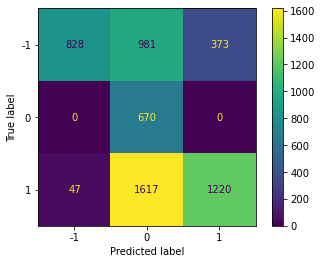

In [92]:
plot_confusion_matrix(nb, X2, y)
plt.show()

# SVC (Support Vector Classifier)

In [93]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
svc_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [95]:
svc_model.fit(X2, y)

C:\Users\cecit\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [100]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=200) # 70% training and 30% test

In [101]:
svc_model.fit(X_train, y_train)

C:\Users\cecit\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [102]:
y_test2 = svc_model.predict(X_test)
y_test2

array([ 1,  1, -1, ...,  1, -1,  1], dtype=int64)

In [103]:
print("Accuracy:", metrics.accuracy_score(y_test, y_test2))

Accuracy: 0.6513654851830332


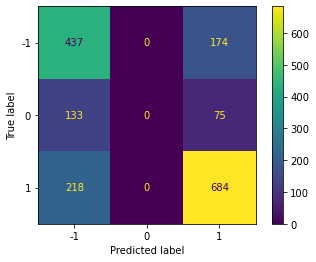

In [104]:
plot_confusion_matrix(svc_model, X_test, y_test)
plt.show()

In [105]:
y_predict = svc_model.predict(X_predict2)
y_predict

array([ 1, -1, -1, ...,  1, -1, -1], dtype=int64)

In [106]:
predicted_results = pd.DataFrame(y_predict)
predicted_results

,0
0,1
1,-1
2,-1
3,1
4,-1
...,...
1055,-1
1056,-1
1057,1
1058,-1


In [107]:
results = pd.DataFrame(amlo_tweets[["tweetText","Date"]])
results

,tweetText,Date
0,"Sí, también misóginos y arribistas.",30 ago.
1,No puedo entender como “hombres” que se presum...,30 ago.
2,Comunista de ultra derecha,29 ago.
3,Gran presidente apoyo total a nuestro presiden...,30 ago.
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.
...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.


In [108]:
results = results.join(predicted_results)
results

,tweetText,Date,0
0,"Sí, también misóginos y arribistas.",30 ago.,1
1,No puedo entender como “hombres” que se presum...,30 ago.,-1
2,Comunista de ultra derecha,29 ago.,-1
3,Gran presidente apoyo total a nuestro presiden...,30 ago.,1
4,"Con la panzota que se carga ??? No mame , no e...",31 ago.,-1
...,...,...,...
1055,@lopezobrador_ Y vemos en tv cualquier cantida...,1 ago.,-1
1056,@lopezobrador_ La trata de personas vemos un ...,1 ago.,-1
1057,@lopezobrador_ debe estar muy orgulloso por ha...,1 ago.,1
1058,@lopezobrador_ anunciará el 15 de Septiembre q...,1 ago.,-1


In [109]:
results.to_csv('results.csv')

* Recall Positive Tweets = 76%
* Recall Negative Tweets = 72%
* Precision Positive Tweets	= 73%
* Precision Negative Tweets	= 55%

## Frequently used words

In [112]:
import string
nltk.download('stopwords')

punctuation = list(string.punctuation)
stop = stopwords.words('spanish') + punctuation + ['rt', 'via'] + ['lopezobrador'] 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(amlo_tweets['processed_tweet']))
plt.imshow(wordcloud)
plt.rcParams["figure.figsize"] = (15,15)
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cecit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'function' object has no attribute 'words'